    Morgan Gere
    IST718
    Lab 3
    11/15/2022

In [1]:
from nbconvert import HTMLExporter
import codecs
import os

In [2]:
exporter = HTMLExporter(template_file='C:\\Users\\Morga\\programsMG\\Big_Analytics\\Labs\\report.tpl')
output, resources = exporter.from_filename('C:\\Users\\Morga\\programsMG\\Big_Analytics\\Labs\\Gere_IST718_Lab_3.ipynb')
new_fnm = 'test.html'
codecs.open(new_fnm, 'w', encoding = 'utf-8').write(output)

In [3]:
import pandas as pd

train_df = pd.read_csv(r'C:\Users\Morga\programsMG\Big_Analytics\Labs\fashion-mnist_train.csv')
test_df = pd.read_csv(r'C:\Users\Morga\programsMG\Big_Analytics\Labs\fashion-mnist_test.csv')

In [4]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Cleaing

In [6]:
# Checking for null values
for item in train_df.isna().sum():
    print('Training:',item)

for item in test_df.isna().sum():
    print('Testing:',item)

Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Training: 0
Trai

There are no null values.  Variables are made up of 0 and 1 in each spot.  This requres no data cleaning.

# Splitting data frame

Data is split into X for what the algorithms are being trained on and y for the labels we want it to predict.  The same is done for the testing set X_test is what the fitted model will be given and it will predict yhat which will be compared to y_test which is just the actual labels to tell our final accuracy.

In [7]:
#Selecting the labesl for y 
y=train_df['label']

In [8]:
#Selecting every comlumn except for labels for the training set X
X=train_df[train_df.columns[1:785]]

In [9]:
#Selecting the labesl for y to compare to yhat predictions
y_test=test_df['label']

In [10]:
# Selecting all comlumns but the label to have the fitted model preform predictions on.
X_test=test_df[test_df.columns[1:785]]

# Initial Data Analysis

In [11]:
import matplotlib.pyplot as plt

(array([6000., 6000., 6000., 6000., 6000., 6000., 6000., 6000., 6000.,
        6000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

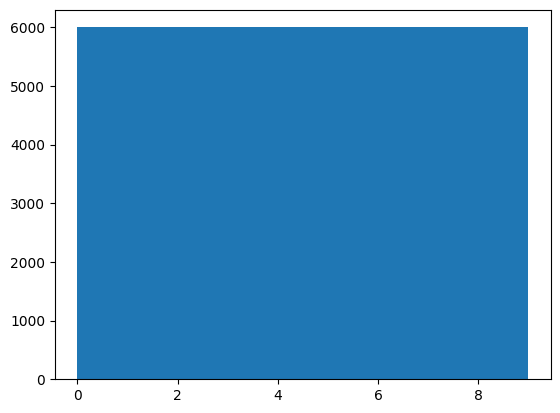

In [12]:
# looking at the distribution of labels to see if there is a skew towards one digit
plt.hist(y)

(array([1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
        1000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

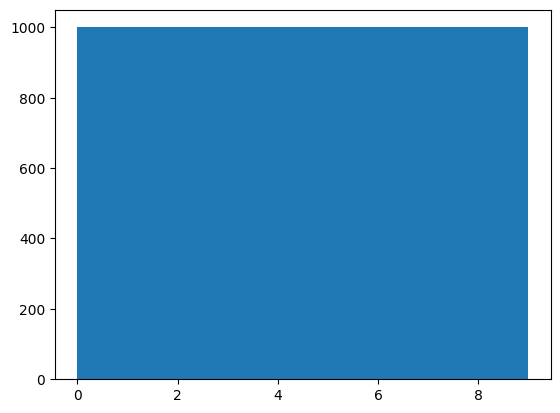

In [13]:
plt.hist(y_test)

Above the distribution of digits was examined and found that it is an even distribution of each hand written digit in both the training and testing sets.  There arre 6000 in the training set and 1000 in the testing set.

In [14]:
import matplotlib
import matplotlib.pyplot as plt

Below we are looking at some off the images fromt the data set.

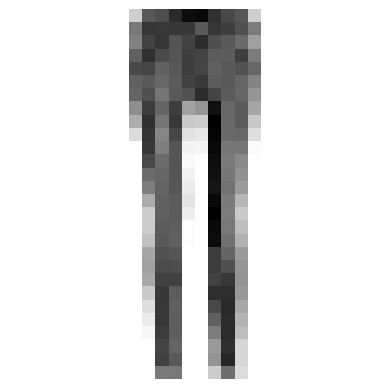

In [15]:
# EXPLORE
# LOOK AT ONE SAMPLE FROM SET
some_digit = X.loc[700]
some_digit_image = some_digit.values.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()


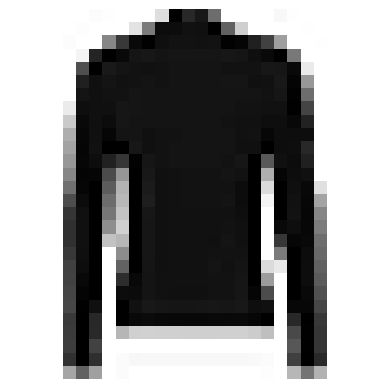

In [16]:
# EXPLORE
# LOOK AT ONE SAMPLE FROM SET
some_digit = X.loc[800]
some_digit_image = some_digit.values.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

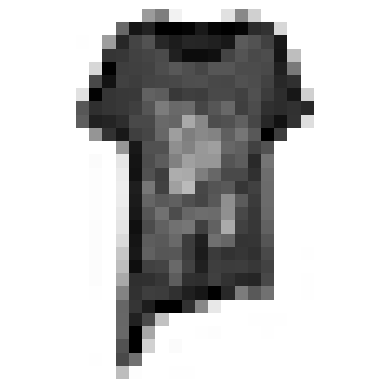

In [17]:
# EXPLORE
# LOOK AT ONE SAMPLE FROM SET
some_digit = X.loc[5000]
some_digit_image = some_digit.values.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

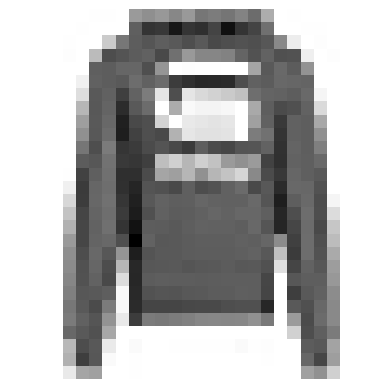

In [18]:
# EXPLORE
# LOOK AT ONE SAMPLE FROM SET
some_digit = X.loc[10000]
some_digit_image = some_digit.values.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

# Model Creation

#### MNB Creation

In [19]:
# import the module
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
import numpy as np
# initialize the model
mnb = MultinomialNB()

In [20]:
import time
start = time.time()

# use the training data to train the model
mnb_model = mnb.fit(X,y)

# FInding the compute time
end = time.time()
final_time_mnb = end-start
print(final_time_mnb)

0.7444958686828613


In [21]:
from sklearn.model_selection import cross_val_predict

#cross validation score
mnb_cv_scores = cross_val_predict(mnb, X, y, cv=10)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y, mnb_cv_scores, labels=[0,1,2,3,4,5,6,7,8,9])
print(cm)
print()

from sklearn.metrics import classification_report
target_names = ['o','1','2','3','4','5','6','7','8','9']
mnb_report= classification_report(y, mnb_cv_scores, target_names=target_names)
print(mnb_report)

[[4736    6   38  709   28    0  385    0   98    0]
 [  69 5332   67  438   22    0   65    0    7    0]
 [  29    2 3546   68 1679    0  539    0  137    0]
 [ 202   73    9 5293  108    0  304    0   11    0]
 [  13   11 1113  834 3767    0  207    0   55    0]
 [   4    0    9    6    5  895   42 3121   51 1867]
 [1339    8  899  446 2097    0  969    0  241    1]
 [   0    0    0    0    0  144    0 5506    8  342]
 [  41    3   12  286  440   20  278   48 4870    2]
 [   0    0    6    4    1  298   78  619    6 4988]]

              precision    recall  f1-score   support

           o       0.74      0.79      0.76      6000
           1       0.98      0.89      0.93      6000
           2       0.62      0.59      0.61      6000
           3       0.65      0.88      0.75      6000
           4       0.46      0.63      0.53      6000
           5       0.66      0.15      0.24      6000
           6       0.34      0.16      0.22      6000
           7       0.59      0.92  

#### MNB Testing

In [22]:
# FInding the accuracy of the model saving it for later use
mnb_acc = mnb_model.score(X_test,y_test)
print(mnb_acc)

0.6674


#### Neurral Network

In [23]:
from sklearn.neural_network import MLPClassifier

In [24]:
nn = MLPClassifier(
                  hidden_layer_sizes=100, 
                  random_state=1, 
                  max_iter=500,
                  shuffle=True,
                  )

In [25]:
import time
start = time.time()

nn.fit(X, y)
# Finding the compute time
end = time.time()
final_time_nn = end-start
print(final_time_nn)

142.2413763999939


In [26]:
#cross validation score
nn_cv_scores = cross_val_predict(nn, X, y, cv=10)

In [27]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y, nn_cv_scores, labels=[0,1,2,3,4,5,6,7,8,9])
print(cm)
print()

from sklearn.metrics import classification_report
target_names = ['o','1','2','3','4','5','6','7','8','9']
nn_report= classification_report(y, nn_cv_scores, target_names=target_names)
print(nn_report)

[[4444   40  106  221   22    5 1120    0   41    1]
 [  14 5832    6   97   10    1   32    1    7    0]
 [  44   15 4634   61  736    0  490    0   20    0]
 [ 159  121   69 5179  221    1  232    1   17    0]
 [   5   20  549  234 4742    0  438    0   12    0]
 [   6    3    1    2    0 5708    4  146   26  104]
 [ 596   21  703  156  576    1 3868    1   77    1]
 [   1    1    0    2    0  133    2 5578   19  264]
 [  33    9   24   29   34   21  155   16 5676    3]
 [   0    0    0    2    0   53    4  212    8 5721]]

              precision    recall  f1-score   support

           o       0.84      0.74      0.79      6000
           1       0.96      0.97      0.97      6000
           2       0.76      0.77      0.77      6000
           3       0.87      0.86      0.86      6000
           4       0.75      0.79      0.77      6000
           5       0.96      0.95      0.96      6000
           6       0.61      0.64      0.63      6000
           7       0.94      0.93  

#### Neral Network Testing

In [28]:
# finding the accuracy of the model saving for later use
nn_acc = nn.score(X_test,y_test)
print(nn_acc)

0.8614


#### Keras

In [29]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [30]:
# Creating a placeholder
inputs = keras.Input(shape=(784,))

In [31]:
# Setting the parameters
dense = layers.Dense(64, activation="relu")
x = dense(inputs)

In [32]:
# Setting the outputs
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

In [33]:
# Creating the model
model = keras.Model(inputs=inputs, outputs=outputs, name="model")

In [34]:
# Summary of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Changing the dataframe to a list of lists of arrays to use in tensorflow
X = X.to_numpy()
X_test = X_test.to_numpy()

In [36]:
import time
start = time.time()
# adding to the model
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)
# Training the model
history = model.fit(X, y, batch_size=64, epochs=45, validation_split=0.2)

# finding the compute time
end = time.time()
final_time_kera = end-start
print(final_time_kera)

Epoch 1/45
750/750 [==============================] - 4s 2ms/step - loss: 2.8395 - accuracy: 0.6554 - val_loss: 0.8909 - val_accuracy: 0.6655
Epoch 2/45
750/750 [==============================] - 1s 1ms/step - loss: 0.8038 - accuracy: 0.7098 - val_loss: 0.7405 - val_accuracy: 0.7423
Epoch 3/45
750/750 [==============================] - 1s 1ms/step - loss: 0.7466 - accuracy: 0.7286 - val_loss: 0.8514 - val_accuracy: 0.7436
Epoch 4/45
750/750 [==============================] - 1s 2ms/step - loss: 0.7090 - accuracy: 0.7403 - val_loss: 0.7490 - val_accuracy: 0.7530
Epoch 5/45
750/750 [==============================] - 1s 1ms/step - loss: 0.6716 - accuracy: 0.7633 - val_loss: 0.6746 - val_accuracy: 0.7843
Epoch 6/45
750/750 [==============================] - 1s 1ms/step - loss: 0.6595 - accuracy: 0.7717 - val_loss: 0.7338 - val_accuracy: 0.7642
Epoch 7/45
750/750 [==============================] - 1s 1ms/step - loss: 0.6430 - accuracy: 0.7797 - val_loss: 0.6600 - val_accuracy: 0.7862
Epoch 

In [37]:
# Finding the accuracy to use later
test_scores = model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 0s - loss: 0.7964 - accuracy: 0.8406 - 233ms/epoch - 744us/step
Test loss: 0.7963587641716003
Test accuracy: 0.8406000137329102


# Analysis

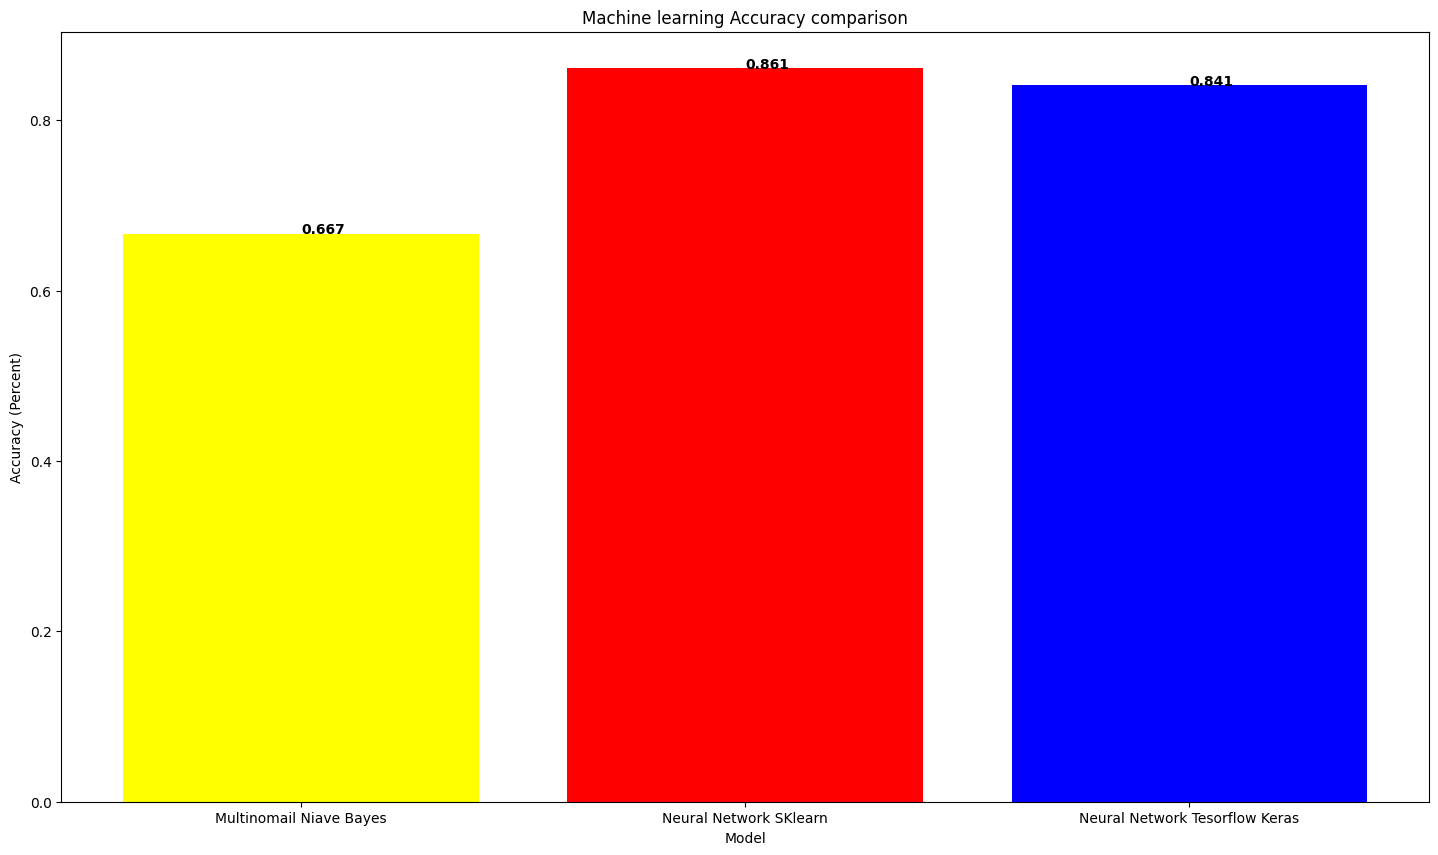

In [38]:
import matplotlib.pyplot as plt

def addlabels(y):
    for i in range(len(y)):
        plt.text(i,y[i],y[i],fontweight = 'bold',rotation=0)

names = ['Multinomail Niave Bayes','Neural Network SKlearn','Neural Network Tesorflow Keras',]  
values = [ round(mnb_acc,3),round(nn_acc,3), round(test_scores[1],3)]
colors2 = ['yellow','red','blue']
plt.figure(figsize=(60, 10))

plt.subplot(131)
plt.bar(names, values, color= colors2)
plt.ylabel('Accuracy (Percent)')
plt.xlabel('Model')
plt.title('Machine learning Accuracy comparison')
addlabels(values)
plt.show()

Below is the graph changed after watching the cat in the hat.

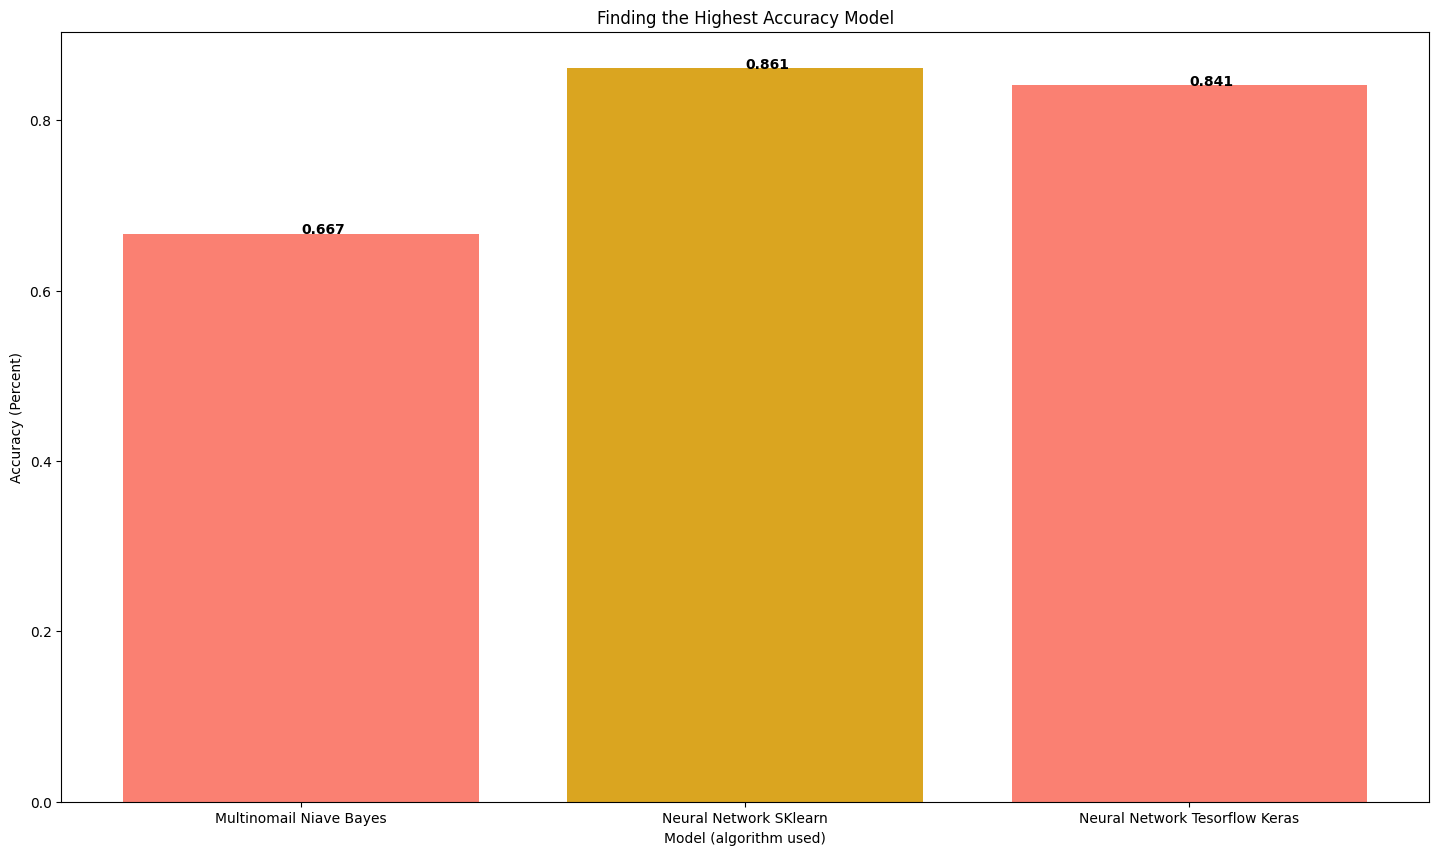

In [45]:
import matplotlib.pyplot as plt

def addlabels(y):
    for i in range(len(y)):
        plt.text(i,y[i],y[i],fontweight = 'bold',rotation=0)

names = ['Multinomail Niave Bayes','Neural Network SKlearn','Neural Network Tesorflow Keras',]  
values = [ round(mnb_acc,3),round(nn_acc,3), round(test_scores[1],3)]
colors2 = ['salmon','goldenrod','salmon']
plt.figure(figsize=(60, 10))

plt.subplot(131)
plt.bar(names, values, color= colors2)
plt.ylabel('Accuracy (Percent)')
plt.xlabel('Model (algorithm used)')
plt.title('Finding the Highest Accuracy Model')
addlabels(values)
plt.show()

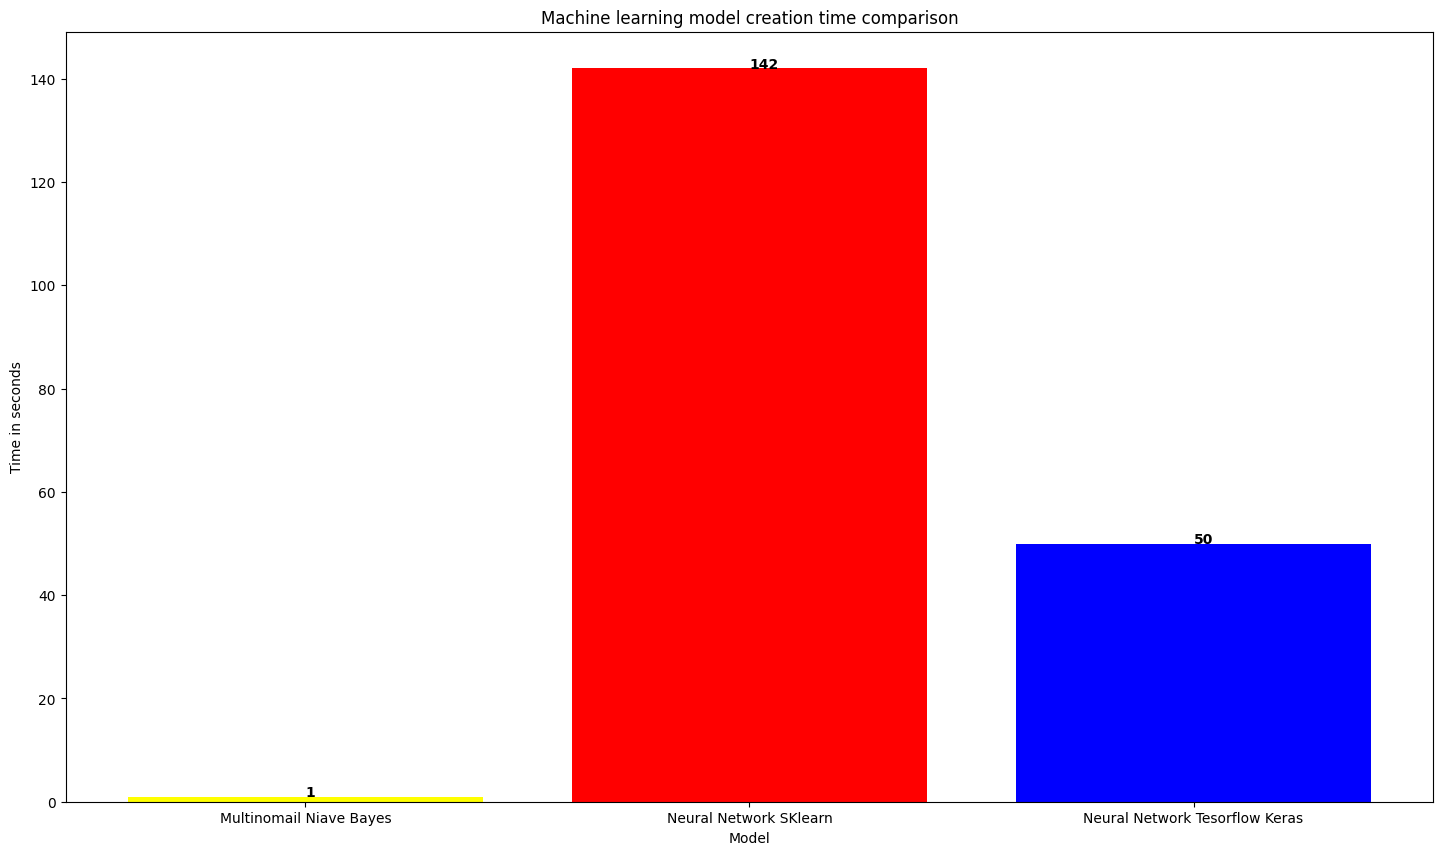

In [39]:
import matplotlib.pyplot as plt


names = ['Multinomail Niave Bayes','Neural Network SKlearn','Neural Network Tesorflow Keras',]  
values = [round(final_time_mnb),round(final_time_nn), round(final_time_kera)]
colors2 = ['yellow','red','blue']
plt.figure(figsize=(60, 10))

plt.subplot(131)
plt.bar(names, values, color= colors2)
plt.ylabel('Time in seconds')
plt.xlabel('Model')
plt.title('Machine learning model creation time comparison')
addlabels(values)
plt.show()

The Multinomial Naive bayes (MNB) and the Neural Network in SKlearn (nn) were very easy to set up while the Neural Netork in Tensorflow (keras) was tricky and time consuming to code.  It was also my first time working with tensorflow which made it more difficult to set up.  First it started with an environment which took about 2 minutes then re-installing the required packages into this python environment took about 10 minutes.  The actual coding took around 25 minutes but it was unframiliar, which is why I attempted it to begin with.  Both Neural Networks preformed with good accuracy for such a small data set.  The MNB preformed way lower on accuracy.  This can all be seen in the first graph of the two above.  The second shows the time it took in seconds which is the compute performatnce.  The SKlearn Neural Netork took the longest while the tensorflow neural network took about half the time.  If you are looking for accuracy either neural network preformed well.  If you are trying to save compute time and want accuracy use Tensorflow. If you want easy coding and good accuracy use SKlearn.   